Лабораторная работа $№4$
--
Киреев Дмитрий $А$-$05$-$20$
--
**Вариант $13$**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Задача 4.1**

Приведены данные о численности населения некоторых крупнейших стран мира по годам с $1950$ -$2000$ г.г. Заполнить последние два столбца таблицы (взять сведения из интернета).  На основе этих данных для конкретного варианта построить наилучший многочлен  по МНК.  Найти численность  населения страны  в $2019$ году  и сравнить полученное значение  с актуальным значением  (взять из интернета).
Решить ту же  задачу на основе интерполяционного многочлена.  То есть построить интерполяционный многочлен по значениям с $1950$-$2020$ г.г. Вычислить значение  для $2019$ года и сравнить с актуальными данными.  Составить отчет по задаче.

Создаем массивы данных населения Италии в соответствующие года

In [2]:
Italia = [46.5, 50, 53, 56.5, 56.5, 58, 59.3, 59.6]
Years = [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]

Для решения задачи методом наименьших квадратов реализуем функции расчета сумм $Si$ и $Bi$. Так же реализуем функцию решения СЛАУ полученной из вычисленных коэффициентов.

In [3]:
def SBorn(years):
    n = 8
    s = [0]*(n*2 - 1)
    for i in range(n*2 - 1):
        for j in range(n):
            s[i] = s[i] + years[j]**i
    return s

In [4]:
def BBorn(years, people):
    n = 8
    b = [0] * n
    for i in range(n):
        for j in range(n):
            b[i] = b[i] + people[j]*(years[j])**i
    return b

In [5]:
def MNK(s, b, n):
    a = [0] * n
    y = [0] * n
    A = [ [0]*n for i in range(n) ]
    for i in range(n):
        for j in range(n):
            A[i][j] = s[i + j]
    for k in range(n - 1):
        for i in range(k + 1, n):
            mu = A[i][k]/A[k][k]
            for j in range(k, n):
                A[i][j] = A[i][j] - mu*A[k][j]
            A[i][k] = mu
    for i in range(n):
        y[i] = b[i]
        for j in range(i):
            y[i] = y[i] - y[j] * A[i][j]
    for i in range(n - 1, -1 , -1):
        a[i] = y[i]/A[i][i]
        for j in range(n - 1, i, -1):
            a[i] = a[i] - (a[j] * A[i][j] / A[i][i])
    return a

Вычисляем коэффициенты многочлена

In [6]:
s = SBorn(Years)
b = BBorn(Years, Italia)
a = MNK(s, b, 8)
a

[687302.6426309205,
 -250.38778734322113,
 -0.6438052704377022,
 0.0002840026825346102,
 1.3536743075237473e-07,
 -4.078993189109483e-11,
 -2.977006109921746e-14,
 9.073543603420017e-18]

Реализуем функцию расчета числа населения в заданном году для данных коэффициентов

In [7]:
def FindPeople(a, year, n):
    people = 0
    for i in range(n):
        people = people + a[i] * year**i
    return people

Население Италии в 2019 году составило 59,73 млн. Видно, что функция нашла ответ довольно точно

In [8]:
FindPeople(a, 2019, 8)

59.620383482426405

Надем наилучий многочлен МНК с помощью погрешность. Выберем тот многочлен, который выдает наименьшую погрешность

In [9]:
def Pogr(people, years):
    n = 8
    q = [0] * n
    for i in range(n):
        a = MNK(s, b, i)
        for j in range(n):
            q[i] = q[i] + (people[j] - FindPeople(a, years[j], i))**2
        q[i] = np.sqrt(q[i]/n)
    MinPogr = q[0]
    IndexOfMin = 0
    print(q)
    for i in range(n):
        if MinPogr > q[i]:
            MinPogr = q[i]
            IndexOfMin = i
    return IndexOfMin

In [10]:
Pogr(Italia, Years)

[55.10036297521097, 4.392536283287822, 1.353291841963074, 0.5069458034345521, 0.45577701125189946, 0.45451183336588724, 0.5132099700199716, 0.4586482499928907]


5

Многочлен пятой степени - наилучший

In [11]:
n = 5
a = MNK(s, b, n)
for i in range(n):
    print(FindPeople(a, Years[i], n), "--" , Italia[i])

46.36015255493112 -- 46.5
50.27419534814544 -- 50
53.27888519188855 -- 53
55.505620431154966 -- 56.5
57.09743266692385 -- 56.5


In [12]:
FindPeople(a, 2019, 5)

59.60279955866281

Реализуем функцию интерполяции

In [13]:
def Inter(people, years, n):
    a = [0] * n
    y = [0] * n
    A = [ [0]*n for i in range(n) ]
    for i in range(n):
        for j in range(n):
            A[i][j] = (years[i])**j
    for k in range(n - 1):
        for i in range(k + 1, n):
            mu = A[i][k]/A[k][k]
            for j in range(k, n):
                A[i][j] = A[i][j] - mu*A[k][j]
            A[i][k] = mu
    for i in range(n):
        y[i] = people[i]
        for j in range(i):
            y[i] = y[i] - y[j] * A[i][j]
    for i in range(n - 1, -1 , -1):
        a[i] = y[i]/A[i][i]
        for j in range(n - 1, i, -1):
            a[i] = a[i] - (a[j] * A[i][j] / A[i][i])
    return a

In [14]:
a = Inter(Italia, Years, 8)
a

[-122423372861815.5,
 431663613873.93896,
 -652286747.1621909,
 547580.4836872991,
 -275.80200523962867,
 0.08334641671524894,
 -1.3992417335596937e-05,
 1.0067243960051858e-09]

Находим ответ с помощью функции интерполяции

In [15]:
FindPeople(a, 2019, 8)

59.203125

**ВЫВОД: Многочлены МНК и интерполяции позволяют довольно точно находить зависимость между двумя переменными основываясь на небольшом объеме данных.**

**Задача 4.2**

Дана функция $y = f(x)$ . Приблизить функцию  методом интерполяции, используя многочлен Лагранжа. Степень многочлена $N$ подобрать таким образом, чтобы максимальная величина погрешности на отрезке $[a, b]$ не превышала заданной величины $e$. Построить графики многочленов и графики погрешностей .Приблизить функцию  методом интерполяции, указанным в  индивидуальном варианте. Сравнить полученные результаты. 


$y = x^3cos(2x)$

Вносим данные: $[a, b] = [3, 6]$, $e = 0.01$. Так же реализуем функцию расчета значений функции в тачках данного разбиения.

In [16]:
n = 10
m = n + 1
eps = 0.01
a = 3
b = 6
ba = b - a
def XY(n):
    otr = ba / n
    X = [0] * m
    for i in range(m):
        X[i] = 3 + i*otr
    Y = [0]*m
    for i in range(m):
        Y[i] = F(X[i])
    return X, Y
def F(x):
    return x**3 * np.cos(2*x)
X, Y = XY(n)

Результаты заносим в таблицу

In [17]:
T1 = pd.DataFrame({'x' : X, 'y' : Y})
T1

,x,y
0,3.0,25.924598
1,3.3,34.148509
2,3.6,28.383239
3,3.9,3.200582
4,4.2,-38.473058
5,4.5,-83.026745
6,4.8,-108.898599
7,5.1,-94.748053
8,5.4,-30.599964
9,5.7,72.871754


Разбираемся с многочленом Лагранжа. Реализуем расчетную функцию.

In [18]:
def LBorn(X, Y, m, t):
    AL = Y
    for i in range(m):
        for j in range(m):
            if j != i:
                AL[i] = AL[i] * (t - X[j]) / (X[i] - X[j])
    return sum(AL)

Разбираемся с Крвадратичным сплайном с дополнительным условием $y'(a) = f'(a)$. Реализуем расчетную функцию, возвращающую матрицу коэффициентов, функцию расчета значения многочлена в данной точке, и функцию расчета погрешности

In [19]:
def Spline(x,y):
    splines = []
    matrix = np.zeros((3,3))
    solve = np.zeros(3)
    for i in range(len(x) - 1):
        for j in range(3):
            matrix[0][j] = x[i]**(2-j)
            matrix[1][j] = x[i+1]**(2-j)
        matrix[2][0] = 2 * x[i]
        matrix[2][1] = 1
        solve[0] = y[i]
        solve[1] = y[i+1]
        if i == 0:
            solve[2] = np.sin(3 * x[0]) + 3 * x[0] * np.cos(3 * x[0])
        else:
            solve[2] = 2 * splines[i-1][0] * x[i] + splines[i-1][1]
        splines.append(np.linalg.solve(matrix, solve))
    return splines

def solution(t, spl, xn):
    ans = 0
    for i in range(len(xn) - 1):
        if (t >= xn[i] and t<= xn[i+1]):
            ans = spl[i][0] * t**2 + spl[i][1] * t + spl[i][2]
            break
    return ans
        
def check2(n):
    x2 = np.linspace(2.5, 4.5, n+1)
    y2 = [F(i) for i in x2]
    spl = Spline(x2,y2)
    x3 = np.linspace(2.5, 4.5, 50)
    EpsList = [abs(F(i) - solution(i, spl, x2)) for i in x3]
    return max(EpsList)

Чисто символически проверяем значение многочлена в крайней точке. Как мы видим, расчет верный!

In [20]:
spl = Spline(X, Y)
res = solution(b, spl, X)
res

182.27245508621672

Для поиска оптимального $n$, при котором достигается точность, составим график погрешности. Как видим, про $n = 10$, погрешность не превышает значения $e = 0.01$

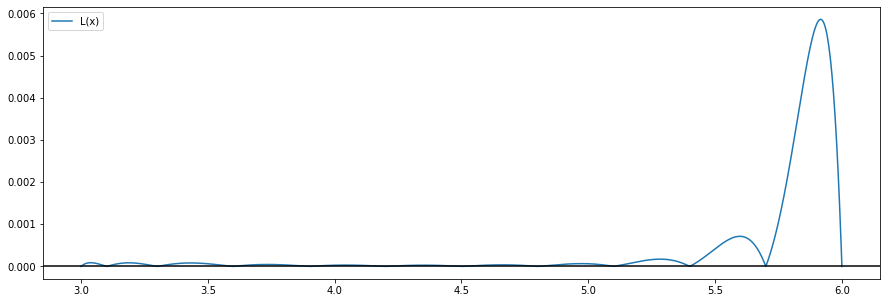

In [21]:
fig, axs = plt.subplots(figsize=(15, 5))
x_dataL = np.linspace(a, b, 1000)
axs.plot(x_dataL, abs(LBorn(X, Y, m, x_dataL) - F(x_dataL)), label='L(x)')
axs.axhline(0, color = "black")
axs.legend()

Составим графики нашей функции и двух многочленов. Как мы видим, графики почти идеально совпадают.

ValueError: operands could not be broadcast together with shapes (1000,) (100,) 

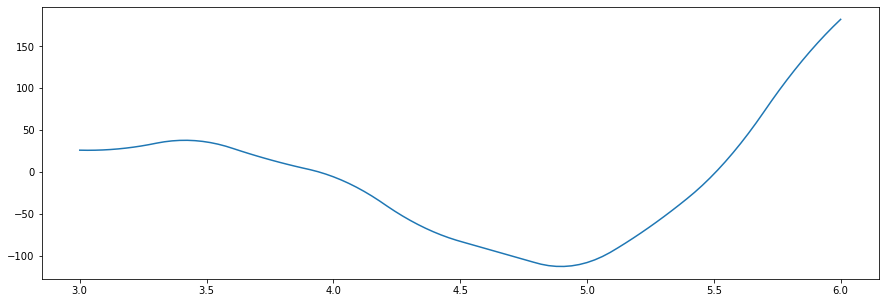

In [22]:
fig, axs = plt.subplots(figsize=(15, 5))
x_data = np.linspace(a, b, 100)

dots = 100
SF = [0] * dots
otrezok = ba/(dots - 1)
for i in range(dots):
    SF[i] = solution(a + i*otrezok, spl, X)

x_dataS = np.linspace(a, b, dots)
axs.plot(x_dataS, SF, label='S(x)')
axs.plot(x_data, LBorn(X, Y, m, x_data), label='L(x)')
axs.plot(x_data, F(x_data), label='F(x)')
axs.axhline(0, color = "black")
axs.legend()

**ВЫВОД: Исходя из проделанных расчетов можно сделать вывод о том, что интерполирующи многочлены находят точное значение в заданных точках разбиения, но на отрезках разбиения имеет место погрешность**

**Задача 4.3**

Задана функция $f(x)$, определенная на отрезке $[-1;1]$. Требуется разложить функцию в ряд Тейлора в окрестности нуля с точностью $e$ и произвести экономизацию полученного степенного ряда.

$f(x) = xcos(x^2)$

Реализуем функции расчета по данной формуле и расчета по разложению в ряд Тейлора с заданной точностью

In [34]:
def F(x):
    return x * np.cos(x**2)

def Teilor(x, eps):
    Pogr = [x]
    sumN = x
    i = 0
    fact = 1
    y = F(x)
    Cmas = [1]
    while abs(sumN - y) > eps:
        i = i + 1
        fact = fact*(2*i)*(2*i - 1)
        sumN = sumN + ((-1)**i)*((x**(4*i+1))/fact)
        Pogr.append(abs(sumN - y))
        Cmas.append(((-1)**i)/fact)
    return sumN, i, Pogr, Cmas

In [35]:
F(0.5)

0.48445621085532237

In [33]:
eps = 0.000000000001
Res, N, PogrMas, CMas = Teilor(0.5, eps)
print(Res)
print(N)
print(PogrMas)
print(CMas)

0.4844562108554537
4
[0.5, 8.121085532236672e-05, 1.693530109481145e-07, 1.8908974386278032e-10, 1.3133938381315602e-13]
[1, -0.5, 0.041666666666666664, -0.001388888888888889, 2.48015873015873e-05]


Функция расчета "по Тейлору" возвращает нам: $Res$ - значение для заданной точки, $N$ - кол-во понадобившихся итераций, $PogrMas$ - массив погрешностей на каждом шаге для построения графика, $CMas$ - массив коэффициентов прои $x$ для дальнейшей экономизации

Строим график зависимости погрешности от номера итерации в разложении Тейлора

In [ ]:
fig, axs = plt.subplots(figsize=(20, 5))
axs.plot(list(range(N + 1)), PogrMas, label='Steps To WIN')
axs.legend()
axs.grid()

Сотсавляем массив коэффициентов ряда Тейлора. Номер элемента - степень при $x$, на который данный коэффициент домножается

In [ ]:
CT = [0] * (N*4+2)
for i in range(N + 1):
    CT[i*4 + 1] = CMas[i]
CT

Реализуем функцию расчета коэффициентов многочлена Чебышева. Для этого дополнительно реализуем функции: домножения на $2x$, иными словами смешения всех элементов на один вправо и домножение каждого на 2, вычитания массивы из массивы и домножение массива на заданное число (это уже для эконамизации)

In [ ]:
def TC(num):
    T = [ [0]*(num + 1) for i in range(num + 1)]
    T[0][0] = 1
    T[1][1] = 1
    for i in range(2, num + 1):
        T[i] = RazMas(Move2x(T[i - 1], num + 1), T[i - 2], num + 1)
    return T[num]

In [ ]:
def Move2x(X, n):
    Y = [0] * n
    for i in range(n - 1, -1, -1):
        Y[i] = X[i - 1] * 2
    Y[0] = 0
    return Y
def RazMas(X, Y, n):
    Z = [0] * n
    for i in range(n):
        Z[i] = X[i] - Y[i]
    return Z
def PowMas(X, z, n):
    Y = [0]*n
    for i in range(n):
        Y[i] = X[i] * z
    return Y

$step$ - максимальная степень данного разложения. Приводим коэффициенты многочлена Чебышева к виду, который можно подставить в ряд Тейлора. 

$step = 17$

In [ ]:
step = N*4+1
T = TC(step)
for i in range(step):
    T[i] = T[i] / T[step]
T[step] = 0
T

In [ ]:
T = PowMas(T, CT[N*4+1], step + 1)
CE1 = RazMas(CT, T, step + 1)
CE1

При подстановке приводим подобные в раде Тейлора. Для этого просто вычитаем из массива коэффициентов разложения Тейлора массив коэффициентов многочена Чебышева. Сразу проверяем, сохраняется ли у нас точность.

**Как мы видим, точность не достигнута. Следовательно наш многочле уже достаточно экономезирован**

При увелчиении точности $e$, увеличивается кол-во итераций в ряде Тейлора, что не дает нам возможности к экономизации. Так е не помогает уменьшение точности.

In [ ]:
resE = 0
for i in range(N*4+1):
    resE = resE + (0.5**i) * CE1[i]
abs(resE - F(0.5)) < eps

**ВЫВОД: Экономизация позволяет нам найти точное решение за меньшее кол-во вычеслений. Но не всегда это имеет смысл, так как функция уже может находить решение достаточно эффективно.**